In [1]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Number of data points
num_points = 500

# Generate random x values
x = np.random.rand(num_points) * 10

# Generate corresponding random y values with some linear relationship
# Here, we're creating a linear relationship with some random noise added
# The equation for the line is y = mx + c + noise
m = 2  # slope
c = 5  # intercept
noise = np.random.normal(loc=0, scale=1, size=num_points)  # Adding some random noise
y = m * x + c + noise

# Print first few values to check
print("First few x values:", x[:5])
print("First few y values:", y[:5])


First few x values: [5.48813504 7.15189366 6.02763376 5.44883183 4.23654799]
First few y values: [14.99075934 17.83195232 18.70340245 16.06189142 14.04038626]


In [2]:
import pandas as pd

# Create a pandas DataFrame with 'x' and 'y' columns
data = pd.DataFrame({'x': x, 'y': y})

# Save the DataFrame to a CSV file
data.to_csv('linear_regression_dataset.csv', index=False)

print("Dataset saved successfully.")


Dataset saved successfully.


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

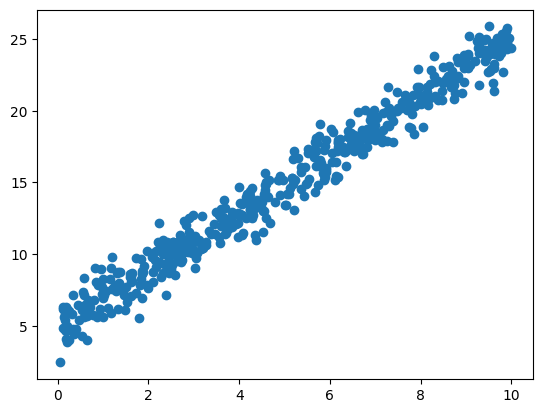

In [5]:
df = pd.read_csv('linear_regression_dataset.csv')
# df.head()
plt.scatter(df.time , df.score)
plt.show()

In [6]:
def loss(m,b,points):
    totalErrors = 0
    for i in range(len(points)):
        x = points.iloc[i].time
        y = points.iloc[i].score
        totalErrors += (y - (m*x +b))**2
    totalErrors / float(len(points))

In [7]:
def gradientDescent(mNow , bNow , points , L):
    mGrad=0
    bGrad=0

    n = len(points)

    for i in range(n):
        X = points.iloc[i].time
        y = points.iloc[i].score

        mGrad += -(2/n) * X * (y - (mNow * X + bNow)) 
        bGrad += -(2/n) * (y - (mNow * X + bNow)) 

    m = mNow - mGrad * L
    b = mNow - bGrad * L

    return m,b

In [25]:
m=0
b=0
L=0.002
epochs = 100
for i in range(epochs):
    m,b = gradientDescent(m,b,df,L)
    print(f'Epoch {i}: m = {m} , b = {b}')

Epoch 0: m = 0.3626778091385058 , b = 0.05932734210182856
Epoch 1: m = 0.6760772501819996 , b = 0.41456364408673546
Epoch 2: m = 0.9408559251945846 , b = 0.7203168029919469
Epoch 3: m = 1.1644450583666939 , b = 0.9786129267480546
Epoch 4: m = 1.3532500664670999 , b = 1.1967275219775226
Epoch 5: m = 1.5126823322873595 , b = 1.3809096668282348
Epoch 6: m = 1.6473114265937772 , b = 1.5364382565819028
Epoch 7: m = 1.760996024490064 , b = 1.6677709769011015
Epoch 8: m = 1.8569944998967847 , b = 1.778672023788665
Epoch 9: m = 1.9380583154966917 , b = 1.8723199903489878
Epoch 10: m = 2.0065108838502477 , b = 1.9513989700972518
Epoch 11: m = 2.0643141599423203 , b = 2.0181754871719515
Epoch 12: m = 2.113124873803618 , b = 2.074563458372675
Epoch 13: m = 2.1543420149195383 , b = 2.1221790489339005
Epoch 14: m = 2.1891469294019865 , b = 2.1623869942849323
Epoch 15: m = 2.2185371791702466 , b = 2.1963397154482416
Epoch 16: m = 2.2433551335966633 , b = 2.2250103491831696
Epoch 17: m = 2.2643121130

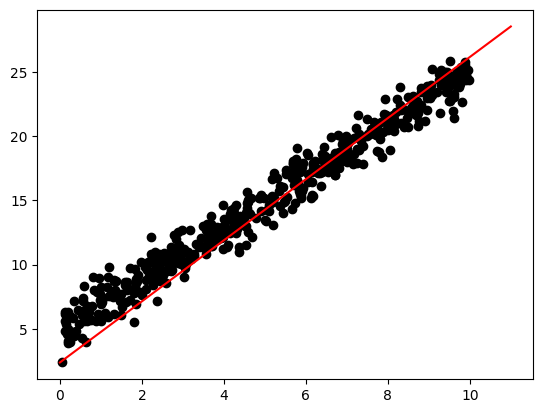

In [26]:
plt.scatter(df.time , df.score , color='black')
plt.plot(list(range(0,12)), [ m * x + b for x in range(0,12)], color='red')
plt.show()